#  Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston). Возмите 7 любых регрессоров (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.float_format ='{:,.5f}'.format

In [75]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,396.90000,5.33000,36.20000


In [76]:
# Разделим датасет на данные с признаками X и целевой переменной y
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1:].copy()

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [78]:
def get_scores(models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=63 ) 
    score_list = [] 
    for model in models:
        model.fit(X_train, y_train['MEDV'])
        score_list.append((model.__class__.__name__, model.score(X_test, y_test)))
    return score_list

In [79]:
kernel = DotProduct() + WhiteKernel()
LinR = LinearRegression()
GausR = GaussianProcessRegressor(kernel=kernel, random_state=0)
SGDR = SGDRegressor(loss='huber', penalty='elasticnet', learning_rate='adaptive', 
                    random_state=0, max_iter=5000000)
HuberR= HuberRegressor(max_iter=5000)
KNR = KNeighborsRegressor()
LinSVR  =LinearSVR(max_iter=500000, random_state=0)
DTR = DecisionTreeRegressor(random_state=0)
RFR = RandomForestRegressor(random_state=0)

#models =[LinR, GausR, SGDR, HuberR, KNR, LinSVR, DTR, RFR]
models =[LinR, GausR, SGDR, HuberR, KNR, LinSVR, DTR, RFR]

In [80]:
score1 = [] 
score1 = get_scores(models, X, y)
score1

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[('LinearRegression', 0.6826784431236119),
 ('GaussianProcessRegressor', 0.6942199536326683),
 ('SGDRegressor', 0.21124008886805679),
 ('HuberRegressor', 0.7205402740330831),
 ('KNeighborsRegressor', 0.559955253729226),
 ('LinearSVR', 0.6969944951130729),
 ('DecisionTreeRegressor', 0.6356309212660141),
 ('RandomForestRegressor', 0.8299281748426962)]

## Выберем признаки с наибольшей корелляцией с целевой переменной


In [81]:
data.corr()['MEDV']

CRIM      -0.38830
ZN         0.36045
INDUS     -0.48373
CHAS       0.17526
NOX       -0.42732
RM         0.69536
AGE       -0.37695
DIS        0.24993
RAD       -0.38163
TAX       -0.46854
PTRATIO   -0.50779
B          0.33346
LSTAT     -0.73766
MEDV       1.00000
Name: MEDV, dtype: float64

In [82]:
score1_1 = [] 
cols = ['LSTAT', 'RM']
score1_1 = get_scores(models, X[cols], y)
score1_1

[('LinearRegression', 0.640063816814487),
 ('GaussianProcessRegressor', 0.6333764976970895),
 ('SGDRegressor', 0.634675276240357),
 ('HuberRegressor', 0.6422460997682891),
 ('KNeighborsRegressor', 0.7236057970709229),
 ('LinearSVR', 0.6349171258192166),
 ('DecisionTreeRegressor', 0.36623478199768916),
 ('RandomForestRegressor', 0.6923480931904609)]

In [83]:
def dif(score1, score2):
    diff = pd.DataFrame([list(zip(*score1))[1], list(zip(*score2))[1]], columns=list(zip(*score1))[0],).T
    diff['diff'] = diff[1]-diff[0]
    return diff


In [84]:
dif(score1, score1_1)

,0,1,diff
LinearRegression,0.68268,0.64006,-0.04261
GaussianProcessRegressor,0.69422,0.63338,-0.06084
SGDRegressor,0.21124,0.63468,0.42344
HuberRegressor,0.72054,0.64225,-0.07829
KNeighborsRegressor,0.55996,0.72361,0.16365
LinearSVR,0.69699,0.63492,-0.06208
DecisionTreeRegressor,0.63563,0.36623,-0.26940
RandomForestRegressor,0.82993,0.69235,-0.13758


Видим хороший рост score у SGDRegressor, у остальных падение

## Применим к признакам OneHotEncoding

In [85]:
#Смотрим из каких уникальных значений состоят признаки в колонках
for col in X.columns:
    print(col, ':\t', len(X[col].unique()))

CRIM :	 504
ZN :	 26
INDUS :	 76
CHAS :	 2
NOX :	 81
RM :	 446
AGE :	 356
DIS :	 412
RAD :	 9
TAX :	 66
PTRATIO :	 46
B :	 357
LSTAT :	 455


In [86]:
#Смотрим из каких уникальных значений состоят признаки в колонках
for col in ['RAD', 'CHAS', 'ZN']:
    print(col, ':\t', X[col].unique())

RAD :	 [ 1  2  3  5  4  8  6  7 24]
CHAS :	 [0 1]
ZN :	 [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]


In [87]:
# функция преобразования категориальных признаков в числовые
def get_one_hot(X, cols):
    for col in cols:
        dummies = pd.get_dummies(X[col], prefix=col, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

In [88]:
# Применим OneHotEncoding
X_ohe = get_one_hot(X, ['RAD', 'ZN'])
X_ohe.drop(['RAD', 'ZN'], axis=1, inplace=True)

In [89]:
score2 = [] 
score2 = get_scores(models, X_ohe, y)
score2

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[('LinearRegression', 0.6987689564104762),
 ('GaussianProcessRegressor', 0.6988690245024365),
 ('SGDRegressor', 0.21618625979325679),
 ('HuberRegressor', 0.727071841244921),
 ('KNeighborsRegressor', 0.5622155196430565),
 ('LinearSVR', 0.7148675565391164),
 ('DecisionTreeRegressor', 0.7535842105167888),
 ('RandomForestRegressor', 0.8281457314473375)]

In [90]:
dif(score1, score2)

,0,1,diff
LinearRegression,0.68268,0.69877,0.01609
GaussianProcessRegressor,0.69422,0.69887,0.00465
SGDRegressor,0.21124,0.21619,0.00495
HuberRegressor,0.72054,0.72707,0.00653
KNeighborsRegressor,0.55996,0.56222,0.00226
LinearSVR,0.69699,0.71487,0.01787
DecisionTreeRegressor,0.63563,0.75358,0.11795
RandomForestRegressor,0.82993,0.82815,-0.00178


Видим небольшой рост score от OneHotEncoding, кроме SGDRegressor

## Применим к признакам нормализацию

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_sc = sc.fit_transform(X_ohe)
score3 = []
score3 = get_scores(models, Xtrain_sc, y)
score3

[('LinearRegression', -9.587123583771517e+19),
 ('GaussianProcessRegressor', 0.7002705033317957),
 ('SGDRegressor', 0.5997954666236103),
 ('HuberRegressor', 0.6199263494068303),
 ('KNeighborsRegressor', 0.7154781945031135),
 ('LinearSVR', 0.5979145914962831),
 ('DecisionTreeRegressor', 0.7537100552894216),
 ('RandomForestRegressor', 0.8291220025206805)]

In [92]:
dif(score2, score3)

,0,1,diff
LinearRegression,0.69877,"-95,871,235,837,715,169,280.00000","-95,871,235,837,715,169,280.00000"
GaussianProcessRegressor,0.69887,0.70027,0.00140
SGDRegressor,0.21619,0.59980,0.38361
HuberRegressor,0.72707,0.61993,-0.10715
KNeighborsRegressor,0.56222,0.71548,0.15326
LinearSVR,0.71487,0.59791,-0.11695
DecisionTreeRegressor,0.75358,0.75371,0.00013
RandomForestRegressor,0.82815,0.82912,0.00098


Видим неплохой рост score от нормализации у SGDRegressor и сильное падение у LinearRegression

## Преобразуем имеющиеся выбросы

In [93]:
Xtrain_sc = pd.DataFrame(Xtrain_sc, columns=X_ohe.columns)
Xtrain_sc

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,ZN_0.0,ZN_12.5,ZN_17.5,ZN_18.0,ZN_20.0,ZN_21.0,ZN_22.0,ZN_25.0,ZN_28.0,ZN_30.0,ZN_33.0,ZN_34.0,ZN_35.0,ZN_40.0,ZN_45.0,ZN_52.5,ZN_55.0,ZN_60.0,ZN_70.0,ZN_75.0,ZN_80.0,ZN_82.5,ZN_85.0,ZN_90.0,ZN_95.0,ZN_100.0
0,-0.41978,-1.28791,-0.27260,-0.14422,0.41367,-0.12001,0.14021,-0.66661,-1.45900,0.44105,-1.07556,4.92950,-0.22314,-0.28495,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,-1.66617,-0.14199,-0.04450,22.47221,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
1,-0.41734,-0.59338,-0.27260,-0.74026,0.19427,0.36717,0.55716,-0.98733,-0.30309,0.44105,-0.49244,-0.20286,4.48144,-0.28495,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
2,-0.41734,-0.59338,-0.27260,-0.74026,1.28271,-0.26581,0.55716,-0.98733,-0.30309,0.39643,-1.20873,-0.20286,4.48144,-0.28495,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
3,-0.41675,-1.30688,-0.27260,-0.83528,1.01630,-0.80989,1.07774,-1.10612,0.11303,0.41616,-1.36152,-0.20286,-0.22314,3.50939,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
4,-0.41248,-1.30688,-0.27260,-0.83528,1.22858,-0.51118,1.07774,-1.10612,0.11303,0.44105,-1.02650,-0.20286,-0.22314,3.50939,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.41323,0.11574,-0.27260,0.15812,0.43932,0.01867,-0.62580,-0.80321,1.17647,0.38722,-0.41815,4.92950,-0.22314,-0.28495,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
502,-0.41525,0.11574,-0.27260,0.15812,-0.23455,0.28893,-0.71664,-0.80321,1.17647,0.44105,-0.50085,4.92950,-0.22314,-0.28495,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
503,-0.41345,0.11574,-0.27260,0.15812,0.98496,0.79745,-0.77368,-0.80321,1.17647,0.44105,-0.98305,4.92950,-0.22314,-0.28495,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-0.20808,-0.08926,-0.14199,-0.14199,-0.07723,-0.10954,-0.08926,-0.07723,-0.07723,-0.11844,-0.10954,-0.07723,-0.07723,-0.08926,-0.07723,-0.07723,-0.17479,-0.06299,-0.06299,-0.09990,-0.08926,-0.04450
504,-0.40776,0.11574,-0.27260,0.15812,0.72567,0.73700,-0.66844,-0.80321,1.17647,0.40322,-0.86530,4.92950,-0.22314,-0.28495,-0.52705,-0.54233,-0.23274,-0.18645,-0.22314,-0.59409,0.60018,-0.14199,-0.04450,-0.04450,-

Посмотрим на выбросы в ['LSTAT', 'B']:

2.545126519962255

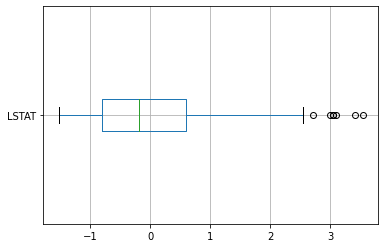

In [94]:
bp = Xtrain_sc.boxplot(['LSTAT'], vert=False, return_type='dict')
# получаем крайнюю правую часть уса
high_LSTAT = bp['whiskers'][1].get_xdata()[1]
high_LSTAT


In [95]:
# Заменим значения с выбросами на медиану

X_ohe_lstat = Xtrain_sc.copy()
X_ohe_lstat.loc[X_ohe_lstat[X_ohe_lstat['LSTAT'] > high_LSTAT].index, 'LSTAT'] = X_ohe_lstat['LSTAT'].median()

-0.1289850584217732

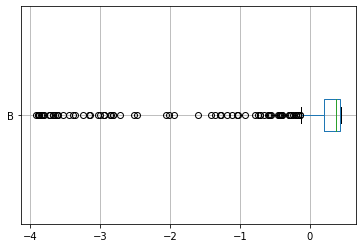

In [96]:
bp = X_ohe_lstat.boxplot(['B'], vert=False, return_type='dict')
# получаем крайнюю левую часть уса
low_B = bp['whiskers'][0].get_xdata()[1]
low_B

In [97]:
X_ohe_ls_b = X_ohe_lstat.copy()
X_ohe_ls_b.loc[X_ohe_ls_b[X_ohe_ls_b['B'] < low_B].index, 'B'] = X_ohe_ls_b['B'].median()

In [98]:
score4 = []
score4 = get_scores(models, X_ohe_ls_b, y)
score4

[('LinearRegression', 0.7009283736912069),
 ('GaussianProcessRegressor', 0.7013170319722234),
 ('SGDRegressor', 0.6113550003705279),
 ('HuberRegressor', 0.6173623115042455),
 ('KNeighborsRegressor', 0.7019220080004199),
 ('LinearSVR', 0.6102908707676656),
 ('DecisionTreeRegressor', 0.6688609760420186),
 ('RandomForestRegressor', 0.8064782284100315)]

In [99]:
dif(score3, score4)

,0,1,diff
LinearRegression,"-95,871,235,837,715,169,280.00000",0.70093,"95,871,235,837,715,169,280.00000"
GaussianProcessRegressor,0.70027,0.70132,0.00105
SGDRegressor,0.59980,0.61136,0.01156
HuberRegressor,0.61993,0.61736,-0.00256
KNeighborsRegressor,0.71548,0.70192,-0.01356
LinearSVR,0.59791,0.61029,0.01238
DecisionTreeRegressor,0.75371,0.66886,-0.08485
RandomForestRegressor,0.82912,0.80648,-0.02264


Благодаря работе с выбросами LinearRegression снова увеличила score,  у остальных моделей незначительные изменения в разные стороны

## Посмотрим на score у моделей при разных гиперпараметрах

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=63 ) 
models=[
      {'name':'LinR',"model":LinearRegression(), 'params':{'fit_intercept': 'True'}},  
      
      {'name':'GausR',"model": GaussianProcessRegressor()  , 
           'params':{'kernel':[DotProduct(), WhiteKernel(), DotProduct() + WhiteKernel()], 
                 'alpha':[0.1, 0.5, 1], 'random_state':[0]}},
      
      {'name':'SGDR',"model": SGDRegressor(), 
           'params':{'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
            'penalty':['l1', 'l2', 'elasticnet'], 'learning_rate':['adaptive'], 
            'random_state':[0], 'max_iter':[5000000]}},
      
      {'name':'HuberR',"model": HuberRegressor(), 
            'params':{'max_iter':[5000], 'alpha':[0.0001, 0.001, 0.01, 1], 'epsilon':[1.2, 1.5, 1.7]}},
      
      {'name':'KNR',"model": KNeighborsRegressor(), 
           'params':{'n_neighbors':[2, 3, 4, 5], 'weights':['uniform', 'distance']}},
      
      {'name':'LinSVR',"model": LinearSVR(), 
           'params':{'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],
                     'C':[0.1,0.2,0.3,0.5,0.7,1], 'max_iter':[50000], 'random_state':[0]}},
      
      {'name':'DTR',"model": DecisionTreeRegressor(), 
           'params':{'max_depth':[3,5,7,9,11],'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
            'random_state':[0]}},
      
      {'name':'RFR',"model": RandomForestRegressor(), 
           'params':{'criterion':['mse', 'mae'], 'max_depth':[3,5,7,9,11], 'random_state':[0]}}

]

res=[]
for v in  models:
    res.append((v['name'], RandomizedSearchCV(v['model'], v['params'], cv=10).fit(X_train, y_train['MEDV'])))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed t

In [31]:
res

[('LinR', RandomizedSearchCV(cv=10, error_score=nan,
                     estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                     iid='deprecated', n_iter=10, n_jobs=None,
                     param_distributions={'fit_intercept': 'True'},
                     pre_dispatch='2*n_jobs', random_state=None, refit=True,
                     return_train_score=False, scoring=None, verbose=0)),
 ('GausR', RandomizedSearchCV(cv=10, error_score=nan,
                     estimator=GaussianProcessRegressor(alpha=1e-10,
                                                        copy_X_train=True,
                                                        kernel=None,
                                                        n_restarts_optimizer=0,
                                                        normalize_y=False,
                                                        optimizer='fmin_l_bfgs_b',


In [32]:
for r in res:
    print(r[0], r[1].best_score_, r[1].best_params_)

LinR 0.7094008670949444 {'fit_intercept': 'T'}
GausR 0.7094025985214327 {'random_state': 0, 'kernel': DotProduct(sigma_0=1), 'alpha': 0.1}
SGDR 0.3377958379675685 {'random_state': 0, 'penalty': 'l1', 'max_iter': 5000000, 'loss': 'huber', 'learning_rate': 'adaptive'}
HuberR 0.7028409199733436 {'max_iter': 5000, 'epsilon': 1.7, 'alpha': 0.001}
KNR 0.48406027731422413 {'weights': 'distance', 'n_neighbors': 5}
LinSVR 0.6777707628894436 {'random_state': 0, 'max_iter': 50000, 'loss': 'squared_epsilon_insensitive', 'C': 0.1}
DTR 0.760900289443625 {'random_state': 0, 'max_depth': 7, 'criterion': 'mse'}
RFR 0.8401912925167299 {'random_state': 0, 'max_depth': 9, 'criterion': 'mse'}


In [45]:
LinR = LinearRegression(*res[0][1].best_params_)
LinR.fit(X_train, y_train['MEDV'])
LinR.score(X_test, y_test['MEDV'])



0.6826784431236119

In [71]:
# Посмотрим score на тестовой выборке
scores5 = []
for v, r in zip(models, res):
  qq = v['model'].set_params(**r[1].best_params_)
  qq.fit(X_train,y_train['MEDV'])
  scores5.append((r[0], qq.score(X_test, y_test)))
scores5

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[('LinR', 0.6826784431236119),
 ('GausR', 0.6838225741583557),
 ('SGDR', 0.27979865800141934),
 ('HuberR', 0.7235050364275157),
 ('KNR', 0.5887005603752999),
 ('LinSVR', 0.6370005776194948),
 ('DTR', 0.6656764673273299),
 ('RFR', 0.8260917384957642)]

In [102]:
dif(score4, scores5)

,0,1,diff
LinearRegression,0.70093,0.68268,-0.01825
GaussianProcessRegressor,0.70132,0.68382,-0.01749
SGDRegressor,0.61136,0.27980,-0.33156
HuberRegressor,0.61736,0.72351,0.10614
KNeighborsRegressor,0.70192,0.58870,-0.11322
LinearSVR,0.61029,0.63700,0.02671
DecisionTreeRegressor,0.66886,0.66568,-0.00318
RandomForestRegressor,0.80648,0.82609,0.01961


Параметры незначительно изменились в разные стороны у моделей

## В зависимости от того проводятся ли преобразования у признаков либо меняются гиперпараметры, модели ведут себя по разному: для одних моделей score может увеличиваться, для каких-то уменьшаться.
